## <div style="padding: 25px;color:white;margin:00px;font-size:60%;text-align:left;border-radius:10px;background-color:#686dec;overflow:hidden"><b><span style='color:white'>1 | BACKGROUND</b></div>

### <b><span style='color:#686dec'>Blog Recommendation</span> </b> 
    
A large number of blogs are published on a daily basis on a variety of subjects by different users. Its important to keep the user invested in material located on a particular website for a variety of reasons. 
    
If a user is interested in a particular article and has made their way from for example a search engine onto the website/blog, its hightly likely that they are interested in something specific at this particular moment in time.
    
As as result, it would be favourable to show the user material that would likely peek their interest and hopefully make them interact with other material on the website, keeping them on the website longer.
    
### <b><span style='color:#686dec'>Notebook Aim</span> </b> 
    
In this notebook, we will aim to create a **user recommendations** for blog content found on `medium`, which is a popular source of information for a variety of topics related to information technology.
    
Only the essential data has been scrapped, in other words, we won't be using the scrapped data of the entire blog article, and will only use a short preview which is selected for each article post.
    
### <b><span style='color:#686dec'>Recommendation Approaches</span> </b> 
    
There are a couple of routes we will go with our data:
- (a) We have `medium` user feedback in the form of blog ratings, which means we can not only use this information to filter our recommendations, but also create a rating based recommendation for the users, which they might have missed.

- (b) We have blog article previews, from which we can create recommendations based on similar content for 

## <div style="padding: 25px;color:white;margin:00px;font-size:60%;text-align:left;border-radius:10px;background-color:#686dec;overflow:hidden"><b><span style='color:white'>2 | LOADING DATA</b></div>
    
Lets finally load and preview our dataset, looking at only the essetial information:
    
We have three sources of data:
- `authors` : Information about each author 
- `blog` : Information about the blog post
- `ratings` : Blog post ratings set by `medium` users (`user_id`), no other information is parsed about each user

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

Load blog article information (unique blog information)

In [2]:
blog = pd.read_csv('blog.csv')
blog = blog.drop(['blog_img','blog_link'],axis=1)
blog = blog.rename(columns={'blog_content':'blog_preview'})
blog.head()

,blog_id,author_id,blog_title,blog_preview,topic,scrape_time
0,1,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,2023-02-27 07:37:48
1,3,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,2023-02-27 07:41:47
2,4,7,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai,2023-02-27 07:41:47
3,5,8,The Automated Stable-Diffusion Checkpoint Merg...,Checkpoint merging is powerful. The power of c...,ai,2023-02-27 07:41:47
4,6,9,The Art of Lazy Creativity: My Experience Co-W...,I was feeling particularly lazy one day and co...,ai,2023-02-27 07:41:47


Load blog article author information (all unique authors)

In [3]:
authors = pd.read_csv('authors.csv')
authors.head()

,author_id,author_name
0,1,yaksh
1,2,XIT
2,3,Daniel Meyer
3,4,Seedify Fund
4,5,Ifedolapo Shiloh Olotu


All ratings set by `user_id` on `blog_id`

In [4]:
ratings = pd.read_csv('ratings.csv')
ratings = ratings.rename(columns={'userId':'user_id'})
ratings.head()

,blog_id,user_id,ratings
0,9025,11,3.5
1,9320,11,5.0
2,9246,11,3.5
3,9431,11,5.0
4,875,11,2.0


Merge user ratings with the blog information

In [6]:
"""

All blog article user rating data

"""

blog_ratings = ratings.merge(blog,on='blog_id',how='left')
blog_ratings = blog_ratings.merge(authors,on='author_id',how='left')
blog_ratings.head(3)

,blog_id,user_id,ratings,author_id,blog_title,blog_preview,topic,scrape_time,author_name
0,9025,11,3.5,5960,How I became a Frontend Developer,A little bit of background about me: as a teen...,web-development,2023-04-04 08:53:52,Steven Dornan
1,9320,11,5.0,6155,Writing an Algorithm to Calculate Article Read...,You have probably noticed a read-time number u...,web-development,2023-04-04 08:53:52,Daniel Pericich
2,9246,11,3.5,6114,Diving into HTML and the Tools of the Trade,It’s been an incredible first week as a Bytewi...,web-development,2023-04-04 08:53:52,Muhammad Naeem Tahir


In [7]:
blogs = blog.merge(authors,on='author_id',how='left')
blogs.head(3)

,blog_id,author_id,blog_title,blog_preview,topic,scrape_time,author_name
0,1,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,2023-02-27 07:37:48,Seedify Fund
1,3,4,Let’s Dominate The Launchpad Space Again,"Hello, fam! If you’ve been with us since 2021,...",ai,2023-02-27 07:41:47,Seedify Fund
2,4,7,Using ChatGPT for User Research,Applying AI to 4 common user research activiti...,ai,2023-02-27 07:41:47,Nick Babich


## <div style="padding: 25px;color:white;margin:00px;font-size:60%;text-align:left;border-radius:10px;background-color:#686dec;overflow:hidden"><b><span style='color:white'>3 | DATA EXPLORATION</b></div>

### <b><span style='color:#686dec'>Blog Ratings Count</span> </b> 

Let's check the number of ratings for each blog article in the form of a histogram

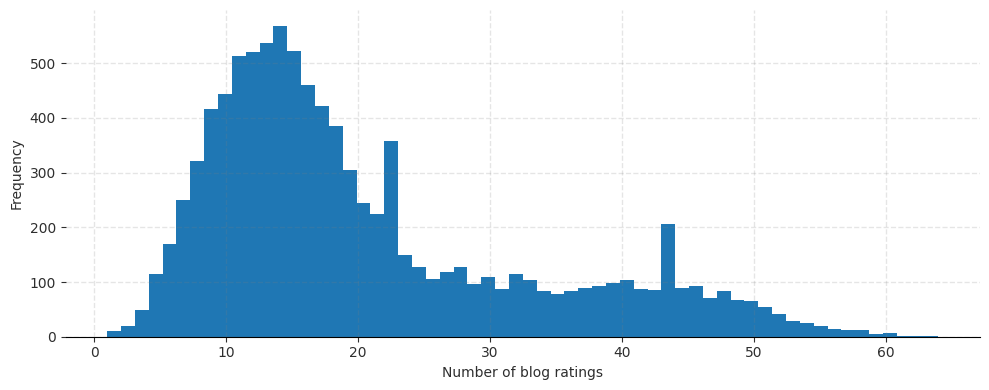

In [25]:
# user blog ratings
rating_ordered = ratings.groupby('blog_id').count()['ratings'].sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,4))
ax = rating_ordered['ratings'].hist(bins=60)

ax.grid(color='gray',ls='--',lw=1,alpha=0.2)
sns.despine(top=True,right=True,left=True)
plt.tick_params(axis='both',colors='#2E2E2E')
plt.xlabel('Number of blog ratings',color='#2E2E2E')
plt.ylabel('Frequency',color='#2E2E2E')
plt.tight_layout()
plt.show()

### <b><span style='color:#686dec'>Blog Rating Distribution</span> </b> 

Most users tend to rate posts that they like or don't like (roughtly 60%)

In [18]:
count = ratings['ratings'].value_counts().round(4).sort_index()
perc = ratings['ratings'].value_counts(normalize=True).round(4).sort_index()*100
rating_info = pd.concat([count,perc],axis=1)
rating_info.columns = ['count','percentage']
rating_info

,count,percentage
ratings,,
0.5,40414,20.19
2.0,49826,24.90
3.5,30286,15.13
5.0,79614,39.78


### <b><span style='color:#686dec'>User Rating Statistics</span> </b> 

Lets check the `user_id` statistics; how many times has a user rated a blog article and what is the average rating for all blog article ratings of a particular user

array([[<Axes: title={'center': 'counts'}>,
        <Axes: title={'center': 'average'}>]], dtype=object)

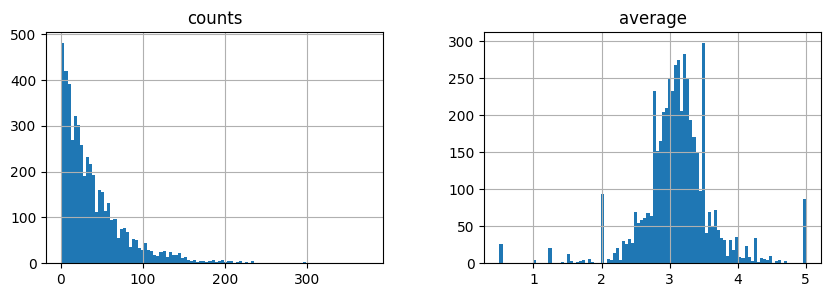

In [20]:
# user based rating statistics
blog_rating_stats = blog_ratings.groupby('user_id').agg(counts=('ratings','count'),
                                                        average=('ratings','mean'))
blog_rating_stats.hist(figsize=(10,3),bins=100)

### <b><span style='color:#686dec'>Blog Rating Segmentation</span> </b> 

### <b><span style='color:#686dec'>Select subset</span> </b> 

Lets filter the blog articles into different groups (`type`), which will help us in providing different types of recommendations 

Evidently not all article posts are liked the same by users. Some articles have not even been discivered by many, yet we dont really know if we should recommend them. Some posts we should probably avoid recommending at all, so its useful to segment the posts by rating.

In [26]:
blogs = blogs.join(blog_ratings.groupby('blog_id').agg(nratings=('ratings','count')))
blogs = blogs.join(blog_ratings.groupby('blog_id').agg(rating=('ratings','mean')).round(2))

blogs['nratings'] = blogs['nratings'].fillna(0)
blogs['nratings'] = blogs['nratings'].astype('int')

<Axes: xlabel='rating', ylabel='Count'>

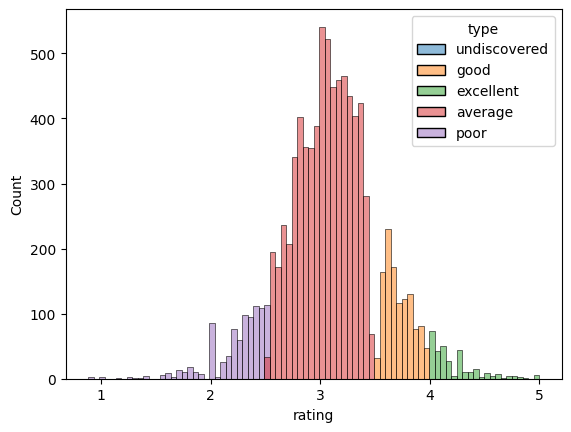

In [27]:
blogs.loc[(blogs['nratings'] == 0),'type'] = 'undiscovered'
blogs.loc[(blogs['rating'] >= 4),'type'] = 'excellent'
blogs.loc[(blogs['rating'] <= 2.5),'type'] = 'poor'
blogs.loc[(blogs['rating'] > 2.5) & (blogs['rating'] < 3.5) ,'type'] = 'average'
blogs.loc[(blogs['rating'] > 3.5) & (blogs['rating'] < 4) ,'type'] = 'good'
sns.histplot(blogs,x='rating',hue='type')

In [28]:
blogs.groupby('type')['author_name'].count()

type
average         6732
excellent        316
good            1172
poor             903
undiscovered     761
Name: author_name, dtype: int64

- We can see that not all `topic` have articles in `excellent` group
- We should combine thr groups `good` and `excellent` into one group and use them as top articles to read

In [29]:
print(blogs.groupby(['topic','type'])['author_name'].count().to_string())

topic                 type        
Cryptocurrency        average         250
                      excellent         7
                      good             38
                      poor             23
                      undiscovered      1
Software-Development  average         272
                      good             21
                      poor              5
                      undiscovered      1
ai                    average         383
                      excellent        60
                      good             94
                      poor            119
                      undiscovered      6
android               average         361
                      excellent         2
                      good             38
                      poor             14
                      undiscovered      1
app-development       average         281
                      good             29
                      poor              3
                      undiscovered      1

## <div style="padding: 25px;color:white;margin:00px;font-size:60%;text-align:left;border-radius:10px;background-color:#686dec;overflow:hidden"><b><span style='color:white'>4 | RECOMMENDATIONS FOR EXISTING USERS</b></div>
 
First, we will start creating recommendations for existing users. Having a rating system evaluation for registered users only, users are quite likely to be familiar with how things work on the website, and so will probably tend to ingore posts with lower ratigs.   
    
#### <b><span style='color:#686dec'>Define subset segment for recommendations</span> </b>      
    
For this reason, lets create recommendations based on their previously rated content. We will do this by filtering `blogs` to include only subsets `good` and `excellent` only. From the above data exploration, we can see that these two subsets sfill do make a fair portion to choose from.

In [98]:
recommended_posts = blogs[blogs['type'].isin(['good','excellent'])]
print(recommended_posts.shape[0],'articles to recommend')

# indicies of posts which are "good", "excellent" in blogs
idx_recommended_posts = recommended_posts.blog_id

1488 articles to recommend


In [99]:
# recommended blog article ratings
data = blog_ratings[blog_ratings.blog_id.isin(idx_recommended_posts)]

`user_id` and `blog_id` contain identifiers that are somewhat out of order, lets use ordered identifiers, utilising mappers

In [100]:
# import warnings; warnings.filterwarnings('ignore')

all_users = data['user_id'].unique().tolist()
all_blogs = data['blog_id'].unique().tolist()

n_users = len(all_users); n_items = len(all_blogs)
user_id2idx = dict(zip(all_users,range(n_users)))
item_id2idx = dict(zip(all_blogs,range(n_items)))
idx2user_id = {j:i for i,j in user_id2idx.items()}
idx2item_id = {j:i for i,j in item_id2idx.items()}

data['user_id'] = data['user_id'].map(user_id2idx)
data['blog_id'] = data['blog_id'].map(item_id2idx)
data.shape

<ipython-input-100-58dcb817c81f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_id'] = data['user_id'].map(user_id2idx)
<ipython-input-100-58dcb817c81f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['blog_id'] = data['blog_id'].map(item_id2idx)


(25991, 9)

### <b><span style='color:#686dec'>Define recommendation approach</span> </b>    
The first approach we will try is a rating based `SVD` decomposition approach. We will be using the scipy realisation, and simply have split the the enitr process of data preprocessing and recommendation generation into two separate classes:
- `BaseFactorizationModel` contains the constructor, which simply defines the names of columns, indicies and ratings, as well as set placeholders for `user` and `item` matrices (output of SVD decomposition). The class also contains method `get_rating_matrix` which generate the rating matrix (matrix contains user rating data for each article) and a generic rating prediction method `predict`, which simply interprets the decomposed matrices scalar product (scores) and returns the highest values (top k) for each user

- `SVD` contains the `fit` method, which is the matrix factorisation itself

In [101]:
class BaseFactorizationModel:
    
    # constructor, define user, item and rating column names
    def __init__(self, random_state=0,
                 user_col='user_id', 
                 item_col='blog_id', 
                 rating_col='ratings'):
        
        self.random_state = np.random.RandomState(random_state)
        self.user_col = user_col
        self.item_col = item_col
        self.rating_col = rating_col
        self.user_matrix = None
        self.item_matrix = None

    # matrix which we will decompose
    def get_rating_matrix(self, data):
        return pd.pivot_table(
            data,
            values=self.rating_col,
            index=self.user_col,
            columns=self.item_col,
            fill_value=0
            ).values

    
    """
    
    When we receive the matrix with scores, for each user
    sort and get the top k 
    
    """
    
    def predict(self, 
                scores,  # (user_id,blog_id) score matrix
                rating_matrix=None, # (user_id,blog_id) rating matrix
                filter_seen=False, 
                k=5):
        
        # filter out films that already have been seen 
        if filter_seen:
            scores = np.multiply(scores,
            np.invert(rating_matrix.astype(bool)))

        # scores index : userId column : blog_id 

        # get indicies of top k scores (indicies : blog_id) in user array
        ind_part = np.argpartition(scores, -k + 1)[:, -k:].copy()  

        # get the values of the top k scores 
        scores_not_sorted = np.take_along_axis(scores, ind_part, axis=1)

        # indicies of scores from lowest to highest 
        ind_sorted = np.argsort(scores_not_sorted, axis=1) 

        # scores from lowest to highest 
        scores_sorted = np.sort(scores_not_sorted, axis=1) 

        # get the indicies of the movieId with the highest scores
        indices = np.take_along_axis(ind_part, ind_sorted, axis=1)

        # for each user return the movies with the highest scores
        preds = pd.DataFrame({
            self.user_col: range(scores.shape[0]), # each user 
            self.item_col: np.flip(indices, axis=1).tolist(), # movieId index 
            self.rating_col: np.flip(scores_sorted.round(3), axis=1).tolist() # movieId score
            })
        
        # convert arrays (user_col,item_col) into rows for each user 
        #preds = preds.explode([self.item_col, self.rating_col])

        return preds

In [102]:
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

class SVD(BaseFactorizationModel):
    
    def __init__(self, 
                 random_state=0, 
                 user_col='user_id', 
                 item_col='blog_id',
                 n_factors=100): # hyperparameter
        super().__init__(random_state, user_col, item_col)
        self.n_factors = n_factors

    """
    
    Decompose the rating matrix into user_id and item_id matrices
    followed by the scalar multiplication of the them
    
    """
        
    def fit(self, data):
        
        # user,movie rating matrix
        self.rating_matrix = self.get_rating_matrix(data) # (unique users,unique films) ratings
        csr_rating_matrix = csr_matrix(self.rating_matrix.astype(float))
        
        # svd decomposition 
        user_matrix, singular_values, item_matrix = svds(A=csr_rating_matrix, 
                                                         k=self.n_factors)
    
        user_matrix = user_matrix * np.sqrt(singular_values)  # (unique users,k latent features)
        item_matrix = item_matrix.T * np.sqrt(singular_values) # (unique films, k latent features)
        self.scores = user_matrix @ item_matrix.T  # score matrix for each user & film (unique users, unique films)
        
        self.user_matrix = user_matrix
        self.item_matrix = item_matrix

In [103]:
# SVD decomposition of rating matrix
svd_model = SVD()
svd_model.fit(data)
print('Rating matrix size',svd_model.rating_matrix.shape)

# extract the too values for each user_id
preds_svd = svd_model.predict(svd_model.scores, 
                              svd_model.rating_matrix) 

print('Decomposed matrices scalar multiplication (scores)',svd_model.scores.shape)

Rating matrix size (4280, 1485)
Decomposed matrices scalar multiplication (scores) (4280, 1485)


### <b><span style='color:#686dec'>Check recommendations</span> </b>

- Now lets check the top recommendations for a user based on their rating history. 
- For this particular user we can see that the user is mostly interested in the topic `backend-developement`
- Top k recommendations from `SVD` factorisation model are also from this genre, and their average ratings are also quite high, which indicates that the model works as expected.

In [104]:
def show_user_predictions(user_id):
    nonmapped = preds_svd[preds_svd['user_id'] == user_id]['blog_id'].explode().tolist()
    mapped = [idx2item_id[i] for i in nonmapped]
    return blogs[blogs.blog_id.isin(mapped)]

show_user_predictions(4277)

,blog_id,author_id,blog_title,blog_preview,topic,scrape_time,author_name,nratings,rating,type
2881,2908,2257,Why Do Some Programmers Say Frontend Is Easier...,"So, you’re wondering if frontend development i...",backend-development,2023-04-04 08:53:52,Flatlogic Platform,45,3.70,good
2893,2920,2267,What are keywords in python programming,"In Python, a keyword is a reserved word that h...",backend-development,2023-04-04 08:53:52,Anwar Ali,40,3.76,good
2908,2935,2279,Exploring the Power of JavaScript Maps: A Begi...,"In JavaScript, a map is a built-in data struct...",backend-development,2023-04-04 08:53:52,Mohammad Basit,43,3.57,good
2918,2945,2285,Observer design pattern: Behavioral pattern,One of the most commonly used Behavioral patte...,backend-development,2023-04-04 08:53:52,"Atul Kumar, SDE1 @ Paytm",37,3.91,good
3041,3068,2289,CLASS META- Django models,Meta in our English oxford dictionary means se...,backend-development,2023-04-04 08:53:52,Kkipngenokoech,37,3.62,good


In [105]:
# user read and rating history 
data[data['user_id'] == 4277].sort_values('ratings',ascending=False)

,blog_id,user_id,ratings,author_id,blog_title,blog_preview,topic,scrape_time,author_name
199857,326,4277,5.0,2226,What caused Discord to switch from Go to Rust?,NOTE: This was one of the factors that led Dis...,backend-development,2023-04-04 08:53:52,Siddharth Pandey
199862,320,4277,5.0,2289,CLASS META- Django models,Meta in our English oxford dictionary means se...,backend-development,2023-04-04 08:53:52,Kkipngenokoech
199891,321,4277,5.0,2285,Observer design pattern: Behavioral pattern,One of the most commonly used Behavioral patte...,backend-development,2023-04-04 08:53:52,"Atul Kumar, SDE1 @ Paytm"
199904,318,4277,5.0,2257,Why Do Some Programmers Say Frontend Is Easier...,"So, you’re wondering if frontend development i...",backend-development,2023-04-04 08:53:52,Flatlogic Platform
199908,315,4277,5.0,2279,Exploring the Power of JavaScript Maps: A Begi...,"In JavaScript, a map is a built-in data struct...",backend-development,2023-04-04 08:53:52,Mohammad Basit
199913,319,4277,5.0,2267,What are keywords in python programming,"In Python, a keyword is a reserved word that h...",backend-development,2023-04-04 08:53:52,Anwar Ali
199863,312,4277,3.5,2359,E se?,"Olá estou aqui denovo, dessa vez não é para fa...",backend-development,2023-04-04 08:53:52,Vinicius Mazzeo
199860,566,4277,2.0,2397,APIs lifecycle Management 101,Learn everything about APIs lifecycle manageme...,backend-development,2023-04-04 08:53:52,Developer Nation
199866,317,4277,2.0,2372,A arte do desenvolvimento web: um guia para in...,Se você está buscando dar os primeiros passos ...,backend-development,2023-04-04 08:53:52,Lucas from Woogon
199923,313,4277,0.5,2240,"Build A Signup, Login and Logout Feature","If you’re getting familiar with Rails, and fee...",backend-development,2023-04-04 08:53:52,Rebecca Wollard


## <div style="padding: 25px;color:white;margin:00px;font-size:60%;text-align:left;border-radius:10px;background-color:#686dec;overflow:hidden"><b><span style='color:white'>5 | SIMILAR ARTICLE RECOMMENDATIONS</b></div>    
    
Now lets look at a different approach, one which utilises textual data information. Whilst the data in column `blog_preview` contains unstructured data, we can utilise a transformed matrix once again, however this time using Bag of Words (`BoW`) and a similarity evaluation method, lets use something standard `cosine similarity`

In [106]:
from sklearn.feature_selection 

ModuleNotFoundError: No module named 'sklearn.feature_selection.text'